# Calculation of the iso-$T_3^0/T_1^0$ lines on Compressor Map

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata, interp1d
from IPython.display import clear_output

from utils_plot_iso_T3T1 import p_over_pt_from_M, mass_flow_per_area_from_M, M_from_p_over_pt
import os

Function for reading `<component>_map/formatted_<values>.txt` files

In [2]:
def read_table(file_path):
    df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # keep old style
    col_vals = df.iloc[0,1:].values
    row_vals = df.iloc[1:,0].values
    central_vals = df.iloc[1:,1:].values
    return col_vals, row_vals, central_vals

#### Variables nomenclature

As we move on to process all the maps (compressor, turbine, nozzle) we encounter different set of vectors and matrices carrying the desired information. Navigating among all of them, especially when we will need to combine them across different components may be tricky, so please refer to this cell to know to which parameters you are looking at.

### Compressor map
Data as read directly from the .txt file (beta_comp and speed_comp have been checked to be the same for all three parameters)

-   beta_comp, speed_comp, mf_comp = read_table(f"{folder}/formatted_mass_flow.txt")
-   _        , _         , pr_comp = read_table(f"{folder}/formatted_iso_pressure_ratio.txt")
-   _        , _         , eff_comp = read_table(f"{folder}/formatted_iso_efficiency.txt")

Data flattened as a 1D array for fitting onto a denser array and with mf_comp and pr_comp as independent parameters:
- mf_flat_comp = mf_vals_comp.flatten()
- pr_flat_comp = iso_pr_vals_comp.flatten()          
- eff_flat_comp = iso_eff_vals_comp.flatten()
- speed_flat_comp = np.repeat(speed_comp, n_cols)   

Definition through meshgrid of the grids of mass flow and pressure ratio (independent parameters):

- mf_grid_comp, pr_grid_comp = np.meshgrid(
    np.linspace(mf_flat_comp.min(), mf_flat_comp.max(), num_steps),
    np.linspace(pr_flat_comp.min(), pr_flat_comp.max(), num_steps)
)

Interpolation onto the just defined grids:

- eff_grid_comp = griddata((mf_flat_comp, pr_flat_comp), eff_flat_comp, (mf_comp_grid, pr_comp_grid), method='cubic')
- speed_grid_comp = griddata((mf_flat_comp, pr_flat_comp), speed_flat_comp, (mf_comp_grid, pr_comp_grid), method='cubic')

Mask to retrieve only the values below the surge line:

- eff_grid_mask_comp = np.where(Y_mask_grid, eff_grid_comp, np.nan)
- speed_grid_mask_comp = np.where(Y_mask_grid, speed_grid_comp, np.nan)

### Turbine map
Data as read directly from the .txt file (beta_turb and pr_turb have been checked to be correctly linearly mapped to each other):

- beta_turb, speed_turb, mf_turb = read_table(f"{folder}/formatted_mass_flow.txt")
- _, _, eff_turb = read_table(f"{folder}/formatted_iso_efficiency.txt")

- pr_turb = np.linspace(PR_turb_min, PR_turb_max, len(beta_turb))

Data flattened as a 1D array for fitting onto a denser array and with mf_turb and pr_turb as independent parameters:

- mf_flat_turb = mf_turb.flatten()
- pr_flat_turb = pr_turb_grid.flatten()
- speed_flat_turb = speed_grid.flatten()
- eff_flat_turb = eff_turb.flatten()

Definition through meshgrid of the grids of mass flow and pressure ratio (independent parameters):

- mf_turb_grid, pr_turb_grid = np.meshgrid(
    np.linspace(mf_flat_turb.min(), mf_flat_turb.max(), num_steps),
    np.linspace(pr_flat_turb.min(), pr_flat_turb.max(), num_steps)
)

Interpolation onto the just defined grids:

- eff_grid_turb = griddata((mf_flat_turb, pr_flat_turb), eff_flat_turb, (mf_grid_turb, pr_grid_turb), method='cubic')
- speed_grid_turb = griddata((mf_flat_turb, pr_flat_turb), speed_flat_turb, (mf_grid_turb, pr_grid_turb), method='cubic')





Read all the compressor files:

In [3]:
folder = "compressor_map"

# the beta and the speed are sampled at the same points for mass flow, pressure ratios, and iso-efficiencies
beta_comp, speed_comp, mf_vals_comp = read_table(f"{folder}/formatted_mass_flow.txt")
_, _, iso_pr_vals_comp = read_table(f"{folder}/formatted_iso_pressure_ratio.txt")
_, _, iso_eff_vals_comp = read_table(f"{folder}/formatted_iso_efficiency.txt")

surge_df = pd.read_csv(f"{folder}/formatted_surge_line.txt", delim_whitespace=True, header=None)

C:\Users\Lenovo1\AppData\Local\Temp\ipykernel_24552\4030266264.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # keep old style
C:\Users\Lenovo1\AppData\Local\Temp\ipykernel_24552\4030266264.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # keep old style
C:\Users\Lenovo1\AppData\Local\Temp\ipykernel_24552\4030266264.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # keep old style
C:\Users\Lenovo1\AppData\Local\Temp\ipykernel_24552\290913450.py:8: FutureWarning: The 'delim_whitespace' keyword i

Post-processing and data interpolation:

[0.45  0.45  0.45  0.45  0.45  0.45  0.45  0.45  0.45  0.5   0.5   0.5
 0.5   0.5   0.5   0.5   0.5   0.5   0.6   0.6   0.6   0.6   0.6   0.6
 0.6   0.6   0.6   0.7   0.7   0.7   0.7   0.7   0.7   0.7   0.7   0.7
 0.8   0.8   0.8   0.8   0.8   0.8   0.8   0.8   0.8   0.85  0.85  0.85
 0.85  0.85  0.85  0.85  0.85  0.85  0.9   0.9   0.9   0.9   0.9   0.9
 0.9   0.9   0.9   0.92  0.92  0.92  0.92  0.92  0.92  0.92  0.92  0.92
 0.94  0.94  0.94  0.94  0.94  0.94  0.94  0.94  0.94  0.955 0.955 0.955
 0.955 0.955 0.955 0.955 0.955 0.955 0.98  0.98  0.98  0.98  0.98  0.98
 0.98  0.98  0.98  1.    1.    1.    1.    1.    1.    1.    1.    1.
 1.04  1.04  1.04  1.04  1.04  1.04  1.04  1.04  1.04  1.08  1.08  1.08
 1.08  1.08  1.08  1.08  1.08  1.08 ]


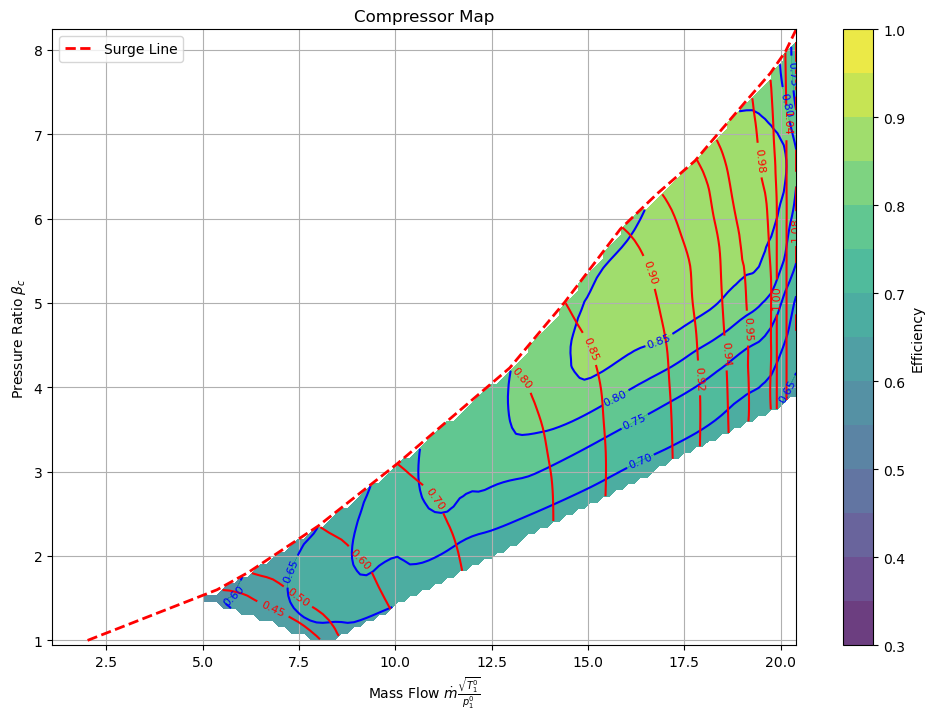

In [28]:
# -----------------------------
# Flatten arrays for interpolation
# -----------------------------
n_rows, n_cols = mf_vals_comp.shape

mf_flat_comp = mf_vals_comp.flatten()
pr_flat_comp = iso_pr_vals_comp.flatten()          # use actual pressure ratio values
eff_flat_comp = iso_eff_vals_comp.flatten()
speed_flat_comp = np.repeat(speed_comp, n_cols)   # repeat speed along columns

# -----------------------------
# Regular grid for plotting
# -----------------------------

num_steps = 100

mf_comp_grid, pr_comp_grid = np.meshgrid(
    np.linspace(mf_flat_comp.min(), mf_flat_comp.max(), num_steps),
    np.linspace(pr_flat_comp.min(), pr_flat_comp.max(), num_steps)
)

# -----------------------------
# Interpolation on grid
# -----------------------------
eff_comp_grid = griddata((mf_flat_comp, pr_flat_comp), eff_flat_comp, (mf_comp_grid, pr_comp_grid), method='cubic')
speed_comp_grid = griddata((mf_flat_comp, pr_flat_comp), speed_flat_comp, (mf_comp_grid, pr_comp_grid), method='cubic')

# -----------------------------
# Surge line mask
# -----------------------------
surge_numbers = surge_df.values.flatten()
n = len(surge_numbers)//2
surge_X, surge_Y = surge_numbers[:n], surge_numbers[n:]
surge_interp = interp1d(surge_X, surge_Y, bounds_error=False, fill_value="extrapolate")
Y_surge_grid = surge_interp(mf_comp_grid[0,:])
Y_mask_grid = pr_comp_grid <= Y_surge_grid[np.newaxis, :]   # broadcast mask

# Apply mask
iso_eff_comp_masked = np.where(Y_mask_grid, eff_comp_grid, np.nan)
speed_comp_grid_masked = np.where(Y_mask_grid, speed_comp_grid, np.nan)

# -----------------------------
# Iso-efficiency contour
# -----------------------------
eff_levels = np.arange(0.3, 1.01, 0.05)
plt.figure(figsize=(12,8))
CF = plt.contourf(mf_comp_grid, pr_comp_grid, iso_eff_comp_masked, levels=eff_levels, cmap="viridis", alpha=0.8)
plt.colorbar(CF, label="Efficiency")
CS_eff = plt.contour(mf_comp_grid, pr_comp_grid, iso_eff_comp_masked, levels=eff_levels, colors='blue', linewidths=1.5)
plt.clabel(CS_eff, inline=True, fontsize=8, fmt="%.2f")

# -----------------------------
# Surge line plot
# -----------------------------
plt.plot(surge_X, surge_Y, 'r--', linewidth=2, label='Surge Line')

# -----------------------------
# Iso-N contour
# -----------------------------
N_levels = np.array([0.45, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94, 0.955, 0.98, 1.0, 1.04, 1.08])
cs = plt.contour(mf_comp_grid, pr_comp_grid, speed_comp_grid_masked, levels=N_levels, colors='r')
plt.clabel(cs, inline=True, fontsize=8, fmt="%1.2f")

# -----------------------------
# Labels and formatting
# -----------------------------
plt.xlabel(r"Mass Flow $\dot m \frac{\sqrt{T_1^0}}{p_1^0}$")
plt.ylabel(r"Pressure Ratio $\beta_c$")
plt.title("Compressor Map")
plt.grid(True)
plt.legend()
plt.show()


Read all the turbine files:

In [5]:
folder = "turbine_map"

# -----------------------------
# Read turbine mass flow
# -----------------------------
beta_turb, speed_turb, mf_vals_turb = read_table(f"{folder}/formatted_mass_flow.txt")
_, _, iso_eff_turb = read_table(f"{folder}/formatted_iso_efficiency.txt")

# Pressure ratio mapping (simple linear scaling, see cell below)
PR_turb_min, PR_turb_max = 0.01, 3.8
PR_turb = np.linspace(PR_turb_min, PR_turb_max, len(beta_turb))

C:\Users\Lenovo1\AppData\Local\Temp\ipykernel_24552\4030266264.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # keep old style
C:\Users\Lenovo1\AppData\Local\Temp\ipykernel_24552\4030266264.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)  # keep old style


By looking directly at the turbine map, we see that here the $\beta$ lines are vertical and linearly mapped to the values of the turbine pressure ratio $\beta_t = p_4^0 / p_3^0$
![turbine_map/turbine_map_photo.jpg](turbine_map/turbine_map_photo.jpg)

In [40]:
# The four parameters characterizing the Turbine working point are stored in:
# PR_turb (shape: (9, )), speed_turb (shape: (9, )), mf_vals_turb (shape: (9, 9)), iso_eff_turb (shape: (9, 9))
# => to fix a point we need to fix two of these: we want them to be PR_turb (already a vector) and mf_vals_turb (to be converted)

n_rows, n_cols = mf_vals_turb.shape  # rows = speed, cols = PR

# Crea griglie di PR e N corrispondenti alla matrice originale
PR_turb_grid, N_grid = np.meshgrid(PR_turb, speed_turb)

# Flatten coerente
mf_flat_turb = mf_vals_turb.flatten()
pr_flat_turb = PR_turb_grid.flatten()
speed_flat_turb = N_grid.flatten()
eff_flat_turb = iso_eff_turb.flatten()

num_steps = 100

mf_turb_grid, pr_turb_grid = np.meshgrid(
    np.linspace(mf_flat_turb.min(), mf_flat_turb.max(), num_steps),
    np.linspace(pr_flat_turb.min(), pr_flat_turb.max(), num_steps)
)

# Now we have two flattened arrays, in mf_values we have all the values of corrected mass flow, 
# in PR_vs_speed_tuples we have, in tuples, the coordinates of each element in mf_values


# Now we want to interpolate
eff_turb_grid = griddata((mf_flat_turb, pr_flat_turb), eff_flat_turb, (mf_turb_grid, pr_turb_grid), method='cubic')
speed_turb_grid = griddata((mf_flat_turb, pr_flat_turb), speed_flat_turb, (mf_turb_grid, pr_turb_grid), method='cubic')

In [41]:
# ============================================================
# DATI NOZZLE
# ============================================================
A_out = 0.3 ** 2 * np.pi     # [m^2]
A_in = 0.45 ** 2 * np.pi

gamma = 1.33    # [-]

R = 287.0      # [J / kg / K]
p_amb = 101325 # [Pa]

# Tt1 = T_amb
# Tt2 = Tt1 * ( 1 + (beta_comp ** ((gamma - 1) / (gamma)) - 1) / eta_comp)
# Tt3 = calculate_T3_tot(Tt2, alpha = alpha0, max_iter = 5, tol = 1e-4)
# Tt4 = Tt3 * ( 1 - eta_turb * ( 1 - PR_turb ** (- (gamma - 1)/(gamma)) ) )
Tt4 = 800

T_ref = 288

PR_nozzle_vals = np.linspace(1, 5, 10000)
pt_vals = PR_nozzle_vals * p_amb
mf_vals_nozz = np.zeros_like(PR_nozzle_vals)

p_over_pt_crit = p_over_pt_from_M(1, gamma)
PR_nozzle_crit = 1.0 / p_over_pt_crit

for i, pt_i in enumerate(pt_vals):
    p_ratio = p_amb / pt_i
    if p_ratio < p_over_pt_crit: # Careful! It's p_over_pt ~ 0.5 not pt_over_p ~ 1.85 
        M_exit = 1.0
        mass_flow_area, _ = mass_flow_per_area_from_M(pt_i, Tt4, M_exit, gamma, R)
        mf_vals_nozz[i] = A_out * mass_flow_area * np.sqrt(Tt4/T_ref) / (pt_i / p_amb)
    else:
        M_root = M_from_p_over_pt(p_ratio, gamma)
        mass_flow_area, _ = mass_flow_per_area_from_M(pt_i, Tt4, M_root, gamma, R)
        mf_vals_nozz[i] = A_out * mass_flow_area *  np.sqrt(Tt4/T_ref) / (pt_i / p_amb)

[ 0.          2.81743372  3.98275851 ... 67.02657185 67.02657185
 67.02657185]


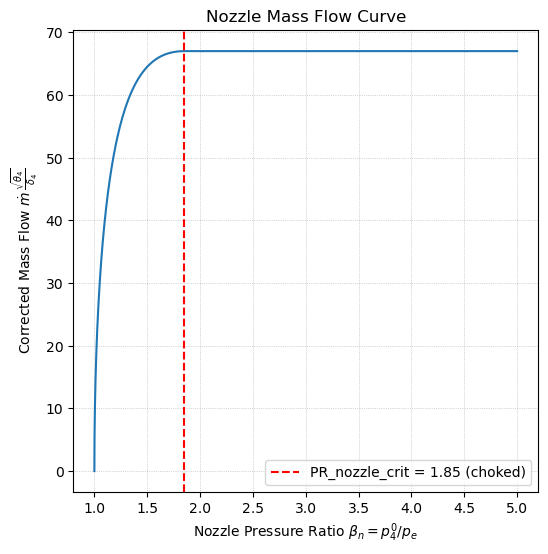

In [42]:
fig, axes = plt.subplots(1, 1, figsize=(6,6))

# --- Nozzle Curve ---
axes.plot(PR_nozzle_vals, mf_vals_nozz, color='tab:blue')
axes.axvline(PR_nozzle_crit, linestyle='--', color='red',
                label=f'PR_nozzle_crit = {PR_nozzle_crit:.2f} (choked)')
axes.set_xlabel(r'Nozzle Pressure Ratio $\beta_n = p_4^0 / p_e$')
axes.set_ylabel(r'Corrected Mass Flow $\dot{m} \, \frac{\sqrt{\theta_4}}{\delta_4}$')
axes.set_title('Nozzle Mass Flow Curve')
axes.grid(True, linestyle=':', linewidth=0.5)
axes.legend()

print(mf_vals_nozz)

In [46]:
# The four parameters characterizing the Turbine working point are stored in:
# PR_turb (shape: (9, )), speed_turb (shape: (9, )), mf_vals_turb (shape: (9, 9)), iso_eff_turb (shape: (9, 9))

# The parameters characterizing the Nozzle working point are stored in:
# PR_nozzle_vals (shape: (100, )), mf_vals_nozz (shape: (100, ))

# We want an output like:
# PR_turb_nozz (shape: (9, 9)), mf_turb_nozz (shape: (9, 9)), corrected with pre-Turbine quantities, N_grid (shape: (9, 9), but is actually the same col repeated across the rows)

mf_crit_nozz = mf_vals_nozz[-1]

PR_turb_nozz = np.zeros_like(mf_vals_turb)
mf_turb_nozz = np.zeros_like(mf_vals_turb)

for i, PRt in enumerate(PR_turb):
    for j, Nt in enumerate(speed_turb):

        # Set a point on the Turbine map (PRt and Nt are already selected by the for cycles):
        mf_turb = mf_vals_turb[j, i] # the correct indexing is mf_vals_turb[PR_idx, N_idx]
        eta_turb = iso_eff_turb[j, i]

        # Calculate the corrected mass flow that would go through the nozzle
        mf_nozzle = mf_turb * PRt * np.sqrt(( 1 - eta_turb * ( 1 - PRt ** ( - (gamma - 1)/(gamma) ) ) ) )
        if mf_nozzle <= mf_crit_nozz:
            # then the selected point is fine, the turbine is not blocked

            # The overall PR is the product between the two
            idx_PRn = np.abs(mf_vals_nozz - mf_nozzle).argmin()
            PR_turb_nozz[j, i] = PRt * PR_nozzle_vals[idx_PRn]

            # The mass flowing is corrected  with pre-turbine params
            mf_turb_nozz[j, i] = mf_turb

        elif np.isclose(mf_nozzle, mf_crit_nozz, rtol = 0.05, atol = 2): 
            # The nozzle is choked, the turbine is blocked: the maximum mass flow is the one allowed by the nozzle, corrected with pre-turbine quantities by convention
            mf_turb_nozz[j, i] = mf_crit_nozz / PRt / np.sqrt(( 1 - eta_turb * ( 1 - PRt ** ( - (gamma - 1)/(gamma) ) ) ) )
            # Now the Nozzle has an increase in PR without letting more mass to flow
            idx_PRn = np.abs(mf_vals_nozz - mf_nozzle).argmin() 
            PR_turb_nozz[j, i] = PRt * PR_nozzle_vals[idx_PRn]
        
        else:
            mf_turb_nozz[j, i] = np.nan
            PR_turb_nozz[j, i] = np.nan


Text(0.5, 1.0, 'Turbine working lines (with iso-$N_{corr}$)')

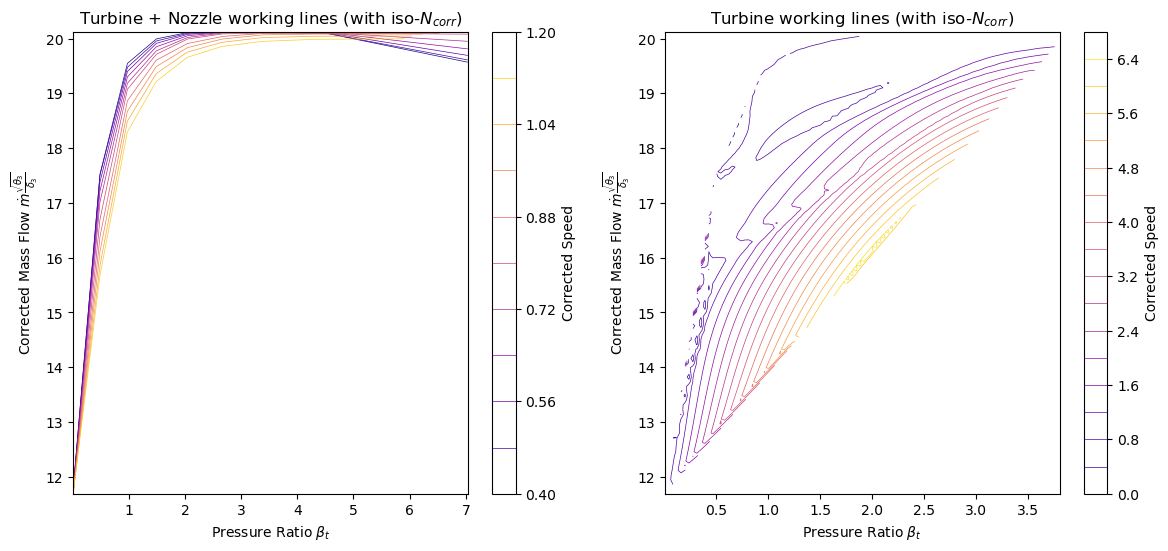

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6) )  # 1 row, 2 columns

# --- Efficiency (Contour) ---
lines1 = axes[0].contour(PR_turb_nozz, mf_turb_nozz, N_grid, levels=10, cmap = 'plasma', linewidths=0.5)
cbar1 = fig.colorbar(lines1 , ax=axes[0], label='Corrected Speed')
axes[0].set_xlabel(r'Pressure Ratio $\beta_t$')
axes[0].set_ylabel(r'Corrected Mass Flow $\dot m \frac{\sqrt{\theta_3}}{\delta_3}$')
axes[0].set_title(r'Turbine + Nozzle working lines (with iso-$N_{corr}$)')

# --- Spool speed N (Contour) ---
lines2 = axes[1].contour(pr_turb_grid, mf_turb_grid, eff_turb_grid, levels=20,  cmap = 'plasma', linewidths=0.5)
cbar2 = fig.colorbar(lines2 , ax=axes[1], label='Corrected Speed')
axes[1].set_xlabel(r'Pressure Ratio $\beta_t$')
axes[1].set_ylabel(r'Corrected Mass Flow $\dot m \frac{\sqrt{\theta_3}}{\delta_3}$')
axes[1].set_title(r'Turbine working lines (with iso-$N_{corr}$)')

# Optional contour lines

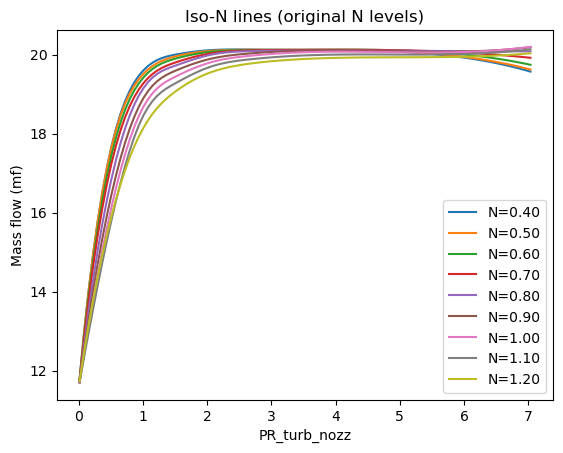

(9, 100)


In [48]:
from scipy.interpolate import interp1d

n_steps = num_steps
PR_dense = np.linspace(PR_turb_nozz.min(), PR_turb_nozz.max(), n_steps)

N_levels = N_grid[:,0]
mf_dense_grid = np.zeros((len(N_levels), n_steps))
PR_dense_grid = np.zeros_like(mf_dense_grid)
N_dense_grid = np.zeros_like(mf_dense_grid)

for i, N in enumerate(N_levels):
    PR_row = PR_turb_nozz[i,:]
    mf_row = mf_turb_nozz[i,:]
    mf_dense_grid[i,:] = interp1d(PR_row, mf_row, kind='cubic', fill_value='extrapolate')(PR_dense)
    PR_dense_grid[i,:] = PR_dense
    N_dense_grid[i,:] = N

for i, N in enumerate(N_levels):
    plt.plot(PR_dense_grid[i,:], mf_dense_grid[i,:], label=f"N={N:.2f}")

plt.xlabel("PR_turb_nozz")
plt.ylabel("Mass flow (mf)")
plt.title("Iso-N lines (original N levels)")
plt.legend()
plt.show()

print(PR_dense_grid.shape)


Post-processing and data interpolation:

## Turbine/Compressor Matching

1. Take a point on the compressor map and retrieve the associated values of corrected speed `N_corr` and compressor efficiency `η_c`.  
2. Assume a trial value for the temperature ratio `T3/T1`.  
3. Use this assumed `T3/T1` to retrieve a point on the turbine map, applying the congruence equations (mass and rpm conservations).  
4. Check the pressure congruence between compressor outlet and turbine inlet/outlet.  
5. Iterate adjusting `T3/T1` until pressure congruence is satisfied.


In [21]:
# Constants definition

epsilon_b = 0.99 # [-] Combustor pressure ratio TODO: implement combustor map

epislon_d = 0.99 # [-] Air intake pressure ratio TODO: implement air intake map

beta_n = 2.5 # [-] Nozzle pressure ratio TODO: implement nozzle map

M0 = 0.2 # [-] Assumed aircraft Mach number (actually is an input from the game)

gamma = 1.4 # [-] Air specific heat ratio cp/cv


### Step 1: Take a point on the compressor map

### Step 2: Assume a trail value for `T3/T1`

In [22]:
# Assicurati che siano array numpy float64
iso_eff_comp_masked = np.array(iso_eff_comp_masked, dtype=np.float64)
speed_comp_grid_masked = np.array(speed_comp_grid_masked, dtype=np.float64)

In [25]:

# Maschera dei valori validi
valid_mask = ~np.isnan(iso_eff_comp_masked) & ~np.isnan(speed_comp_grid_masked)
valid_indices = list(zip(*np.where(valid_mask)))

# Prealloca array per salvare
#  il miglior temp_ratio per ogni punto
best_temp_ratios = np.full(iso_eff_comp_masked.shape, np.nan)
best_differences = np.full(iso_eff_comp_masked.shape, np.nan)
    
# Itera solo sui punti validi
total_points = len(valid_indices)

# Flatten delle griglie
mf_turb_flat = mf_dense_grid.flatten()
pr_turb_flat = PR_dense_grid.flatten()
speed_turb_flat = N_dense_grid.flatten()
eff_flat = iso_eff_comp_masked.flatten()

for count, (i, j) in enumerate(valid_indices, start=1):
# for count, (i, j) in enumerate(valid_indices[500:600], start=1):
    # Stampa lo stato di avanzamento
    print(f"Processing point {count}/{total_points} -> index (i={i}, j={j})")

    differences = []
    temp_ratios_list = []
    pre_mf_cons_turb =  mf_dense_grid[i, j] / PR_dense_grid[i, j] / epsilon_b
    pre_N_cons_turb = speed_comp_grid_masked[i, j] 

    LHS_pressure_eq = (1 + (gamma - 1) / 2 * M0 ** 2) ** (gamma / (gamma - 1)) * epislon_d * pr_turb_grid[i, j]
    pre_RHS_pressure_eq = beta_n / epsilon_b

    for temp_ratio in np.arange(0.9, 3.9, 0.05):
        
        mf_cons_turb = pre_mf_cons_turb * np.sqrt(temp_ratio) 
        N_cons_turb = pre_N_cons_turb / np.sqrt(temp_ratio)

        distances = np.sqrt((mf_turb_flat - mf_cons_turb)**2 + (speed_turb_flat - N_cons_turb)**2)
        idx_min = np.nanargmin(distances)

        closest_beta = pr_turb_flat[idx_min]

        # Calculate RHS
        RHS_pressure_eq = closest_beta * pre_RHS_pressure_eq
        # and compare it with LHS
        differences.append(abs(LHS_pressure_eq - RHS_pressure_eq))
        temp_ratios_list.append(temp_ratio)

    # Salva il temp_ratio con differenza minima
    min_idx = np.argmin(differences)
    best_temp_ratios[i, j] = temp_ratios_list[min_idx]
    best_differences[i, j] = differences[min_idx]
    clear_output(wait = True)


Processing point 169/2966 -> index (i=9, j=7)


IndexError: index 9 is out of bounds for axis 0 with size 9

NameError: name 'best_temp_ratios' is not defined

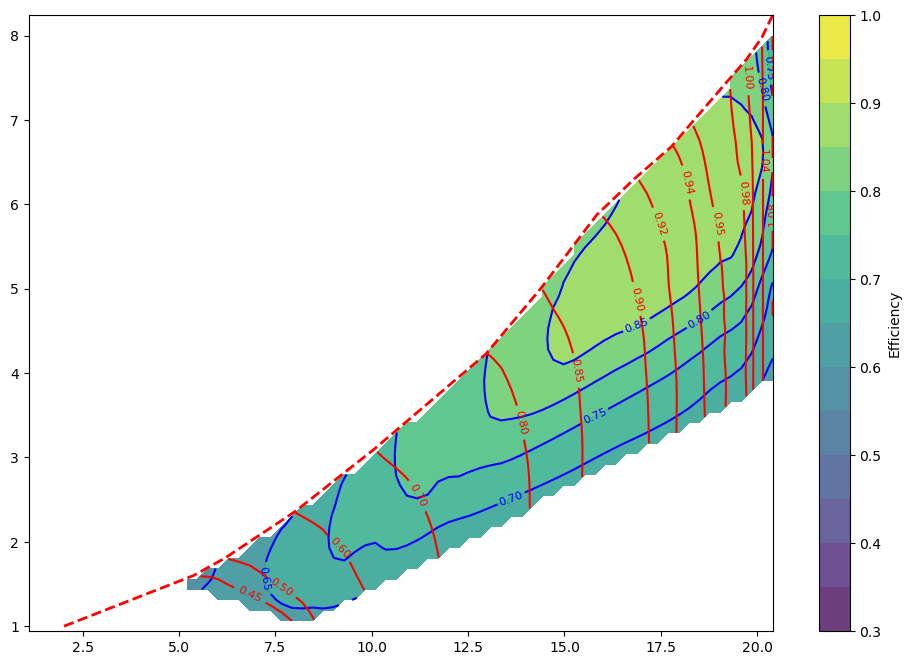

In [ ]:
plt.figure(figsize=(12,8))
CF = plt.contourf(mf_comp_grid, pr_comp_grid, iso_eff_comp_masked, levels=eff_levels, cmap="viridis", alpha=0.8)
plt.colorbar(CF, label="Efficiency")
CS_eff = plt.contour(mf_comp_grid, pr_comp_grid, iso_eff_comp_masked, levels=eff_levels, colors='blue', linewidths=1.5)
plt.clabel(CS_eff, inline=True, fontsize=8, fmt="%.2f")

# -----------------------------
# Surge line plot
# -----------------------------
plt.plot(surge_X, surge_Y, 'r--', linewidth=2, label='Surge Line')

# -----------------------------
# Iso-N contour
# -----------------------------
N_levels = np.array([0.45, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94, 0.955, 0.98, 1.0, 1.04, 1.08])
cs = plt.contour(mf_comp_grid, pr_comp_grid, speed_comp_grid_masked, levels=N_levels, colors='r')
plt.clabel(cs, inline=True, fontsize=8, fmt="%1.2f")

# -----------------------------
# iso-Temperature ratio contour
# -----------------------------
temp_ratio_levels = np.arange(0, 4, 0.5)
CS_eff = plt.contour(mf_comp_grid, pr_comp_grid, best_temp_ratios, levels=temp_ratio_levels, colors='black', linewidths=1.5)
plt.clabel(CS_eff, inline=True, fontsize=8, fmt="%.2f")


plt.title('Mappa dei Migliori Temp Ratios')
plt.xlabel(r"Mass Flow $\dot m \frac{\sqrt{T_1^0}}{p_1^0}$")
plt.ylabel(r"Pressure Ratio $\beta_c$")

plt.gca().set_aspect(3)
plt.tight_layout()
plt.show()

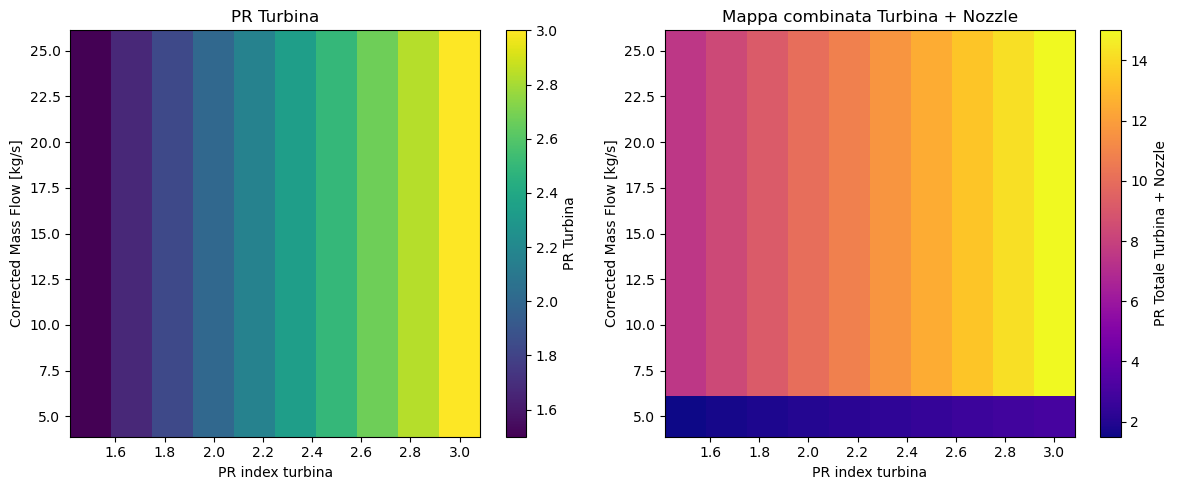

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# -------------------------------
# Esempio dati turbina (2D)
# mf_vals_turb = portata corretta [kg/s]
# PR_grid_turb = rapporto di pressione turbina (Pt_in / Pt_out)
# Qui devi sostituire con i tuoi dati reali
n_Nc, n_PR = 10, 10
mf_vals_turb = np.linspace(5, 25, n_Nc).reshape(-1,1) * np.ones((1,n_PR))  # esempio
PR_grid_turb = np.linspace(1.5, 3.0, n_PR).reshape(1,-1) * np.ones((n_Nc,1))  # esempio

# -------------------------------
# Esempio dati ugello (1D)
# mdot_corr_vals = portata corretta [kg/s] vs NPR_vals
# Qui devi sostituire con i tuoi calcoli del nozzle
NPR_vals = np.linspace(1, 5, 100)             # NPR = Pt_exit / P_amb
mdot_corr_vals = 0.5 * NPR_vals**0.5 + 5      # esempio, sostituire con i tuoi valori
mdot_max = mdot_corr_vals.max()               # portata massima dell'ugello (choking)

# -------------------------------
# Interpolazione ugello: portata -> NPR
mdot_to_NPR = interp1d(mdot_corr_vals, NPR_vals,
                       bounds_error=False,
                       fill_value=(NPR_vals[0], NPR_vals[-1]))  # fuori range usa estremi

# Limita la portata della turbina alla portata massima dell'ugello
mf_clipped = np.minimum(mf_vals_turb, mdot_max)

# Calcola NPR corrispondente per l'ugello
NPR_grid_ugello = mdot_to_NPR(mf_clipped)

# -------------------------------
# Mappa combinata PR totale
PR_tot_grid = PR_grid_turb * NPR_grid_ugello

# -------------------------------
# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
pcm1 = plt.pcolormesh(PR_grid_turb, mf_vals_turb, PR_grid_turb, shading='auto', cmap='viridis')
plt.colorbar(pcm1, label='PR Turbina')
plt.xlabel('PR index turbina')
plt.ylabel('Corrected Mass Flow [kg/s]')
plt.title('PR Turbina')

plt.subplot(1,2,2)
pcm2 = plt.pcolormesh(PR_grid_turb, mf_vals_turb, PR_tot_grid, shading='auto', cmap='plasma')
plt.colorbar(pcm2, label='PR Totale Turbina + Nozzle')
plt.xlabel('PR index turbina')
plt.ylabel('Corrected Mass Flow [kg/s]')
plt.title('Mappa combinata Turbina + Nozzle')

plt.tight_layout()
plt.show()
